In [178]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import os


In [179]:
#Check's for PostgreSQL.py configuration file, if non, it will generate one.
#NOTICE -- Please configure API/PostgreSQL.py before running all code. Ensure it is added to 'gitignore' before running code and pushing to the repository
#ADDITIONALLY -- If the strings get renamed, simply delete 'PostgreSQL.py' and re-run this code.
# This code was grabbed from previous projects
sqlconfig = os.path.join("API","PostgreSQL.py")

if not os.path.exists(sqlconfig):
    with open(sqlconfig, 'w') as file:
        file.write("connectionString = ''")
    print(f"Configuration file has been created, please configure, restart kernel and try again.")
else:
    print(f"Configuration file already exists, importing...")
    
from API.PostgreSQL import *

Configuration file already exists, importing...


In [180]:
# Load data from the SQL server
engine = create_engine(connectionString)
Session = sessionmaker(bind=engine)
tableName = "RedWineData"

RedWineDF = pd.read_sql_table(tableName, engine)
RedWineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [181]:
RedWineDF.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [182]:
print(RedWineDF.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


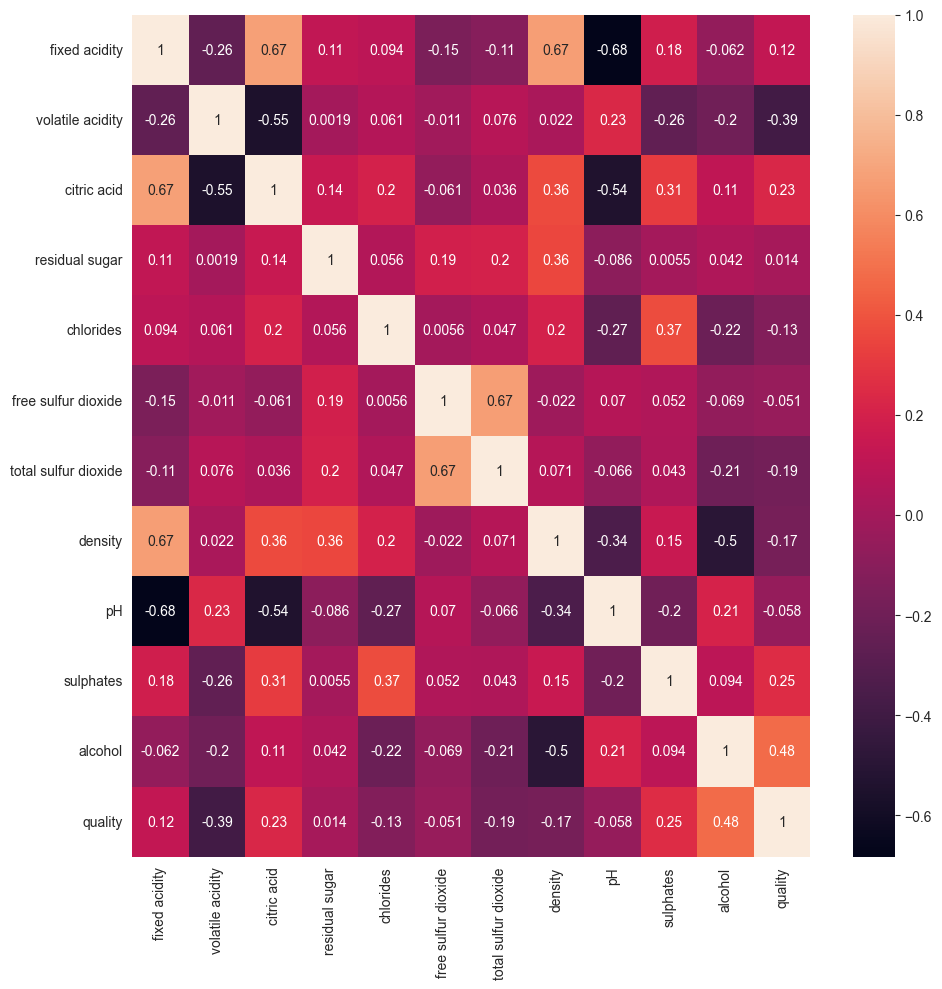

In [183]:
import seaborn as sns
# Cool correlation matrix graph
corrMatrix = RedWineDF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.savefig("visualizations/CorrelationMatrix.png", dpi=300, transparent=True)
plt.show()




In [208]:
RedWineDF['quality'] = RedWineDF['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [209]:
# Split into X and y
X = RedWineDF.drop('quality', axis=1).copy()
y = RedWineDF['quality'].copy()



In [210]:
# Import tensorflow
import tensorflow as tf


In [211]:
# Import sklearn train test split
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
from sklearn.preprocessing import StandardScaler
# scaling features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [213]:
# Keras model using GPU
numberInputFeatures = X_train.shape[1]
layerNodes = 256
layerNodes2 = 128
layerNodes3 = 64
layerNodes4 = 32


model = tf.keras.models.Sequential()

# Layer 1
model.add(tf.keras.layers.Dense(units=layerNodes, input_dim=numberInputFeatures, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes2, input_dim=numberInputFeatures, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes3, activation='relu'))
model.add(tf.keras.layers.Dense(units=layerNodes4, activation='relu'))

# Output
model.add(tf.keras.layers.Dense(units=1, input_dim=numberInputFeatures, activation='sigmoid'))

# Check the structure of the model
model.summary()

C:\Users\nolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [215]:
# Train model using GPU
fit_model = model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6272 - loss: 0.6346   
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7555 - loss: 0.5078
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7378 - loss: 0.5104
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7670 - loss: 0.4867
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7586 - loss: 0.4722
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.7909 - loss: 0.4510
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.7921 - loss: 0.4305
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8098 - loss: 0.4136
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8214 - loss: 0.4120
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8099 - loss: 0.4067
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8380 - loss: 0.3628
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 

In [216]:
# Performance / accuracy validation
model.evaluate(X_test_scaled,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7867 - loss: 2.1907


[2.3053860664367676, 0.7574999928474426]

In [217]:
model.save('ModelExport/WineDeepLearning.h5')

In [218]:
predictions = model.predict(X_test_scaled)
print(len(predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
400


In [219]:
predictions = model.predict(X_test_scaled)
RedWineDF['predicted_quality'] = predictions.round().astype(int)
RedWineDF

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


ValueError: Length of values (400) does not match length of index (1599)

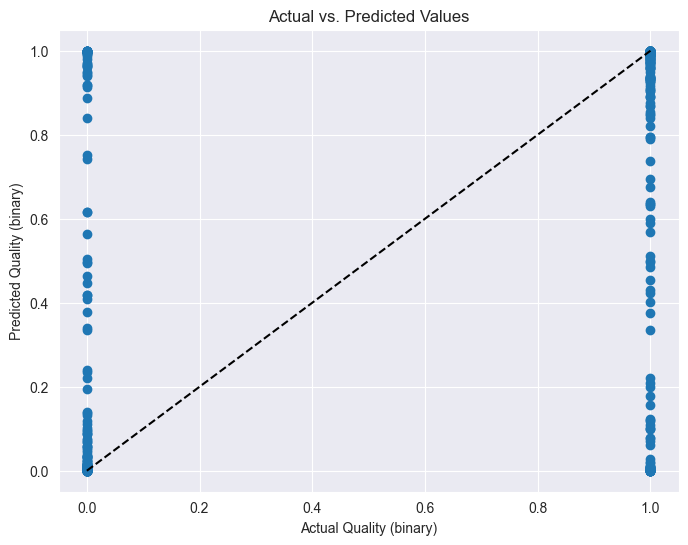

In [206]:
import matplotlib.pyplot as plt

# Get the actual and predicted values
y_test = y_test.tolist()
predictions = predictions.squeeze()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)

# Add a line of perfect agreement for reference
perfect_line = [0, 1]
plt.plot([min(y_test), max(y_test)], perfect_line, 'k--')

# Set title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Quality (binary)')
plt.ylabel('Predicted Quality (binary)')

# Display the plot
plt.show()

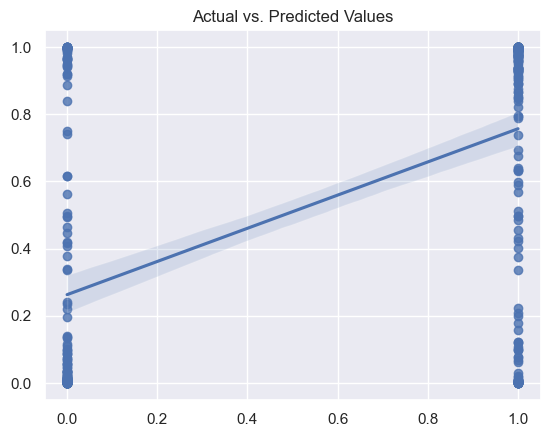